In [1]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [10]:
# Load the Iris dataset included with scikit-learn
data = load_iris()


In [12]:
# Put data in a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df.columns = [i.strip('(cm) ') for i in df.columns.tolist()]


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# Add target and class to DataFrame
df['target'] = data.target
df['class'] = data.target_names[data.target]
df.sample(2)

,sepal length,sepal width,petal length,petal width,target,class
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor


In [21]:
# Show 10 random samples
df.sample(10)

,sepal length,sepal width,petal length,petal width,target,class
85,6.0,3.4,4.5,1.6,1,versicolor
137,6.4,3.1,5.5,1.8,2,virginica
77,6.7,3.0,5.0,1.7,1,versicolor
108,6.7,2.5,5.8,1.8,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica
121,5.6,2.8,4.9,2.0,2,virginica
12,4.8,3.0,1.4,0.1,0,setosa
31,5.4,3.4,1.5,0.4,0,setosa
96,5.7,2.9,4.2,1.3,1,versicolor


In [22]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [24]:
# same process as always, identify your X's and your y's
X, y = df.iloc[:, :4], df.iloc[:, 4]
print(X.sample(2))
print(y.sample(2))

     sepal length  sepal width  petal length  petal width
114           5.8          2.8           5.1          2.4
49            5.0          3.3           1.4          0.2
15     0
143    2
Name: target, dtype: int32


In [25]:
#train-test-split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# Scale the X's
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
# apply the lda transformation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis(n_components=2)
model.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [100]:
# select 2 principal components
x_lda = model.transform(X_train_scaled)
x_lda_test = model.transform(X_test_scaled)

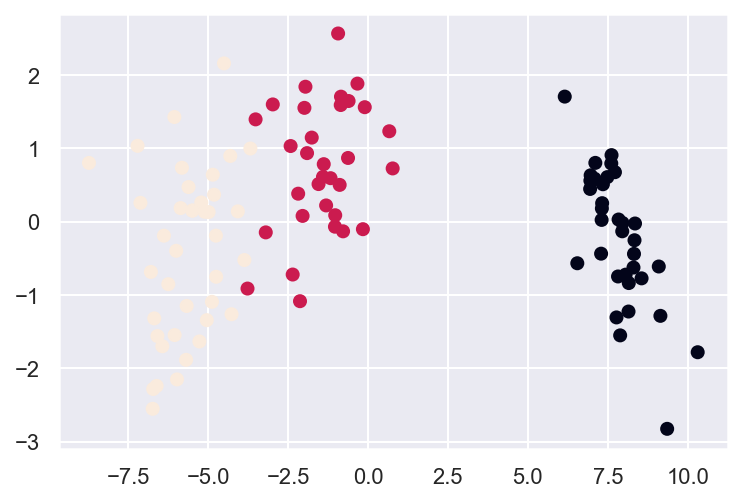

In [101]:
# take a look at the new axes for the data and plot them
# print(X_LDA)
ld1 = x_lda[:, 0]
ld2 = x_lda[:, 1]
plt.scatter(ld1, ld2, c=y_train)

In [91]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target',
       'class'],
      dtype='object')

In [102]:
# what about the variability?
var_rat = model.explained_variance_ratio_
var_rat

array([0.99231557, 0.00768443])

In [103]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_scaled, y_train)

y_pred=clf.predict(X_test_scaled)

In [104]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [110]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?
clf.fit(X_train_scaled[:, :2], y_train)

y_pred1=clf.predict(X_test_scaled[:, :2])

In [111]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.6444444444444445
